## Step 1: Reading and Understanding the Data¶


In [1]:
import jovian

#### Importing and Understanding the data¶


In [2]:
# importing libraries for suppressing warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
leads_data=pd.read_csv(r"C:\Users\saval\Downloads\Lead Scoring Assignment\Leads.csv")

In [4]:
# Reading the data
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Data Preparation

In [5]:
leads_data.shape

(9240, 37)

In [6]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- There are null values available in few columns

#### Data cleaning

In [7]:
leads_data.duplicated().sum()

0

In [8]:
leads_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
leads_data.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

#### Following columns should be droped.
  - 'Lead Number'- Id columns- Not required  
  - 'City' columns- Not required
  -  Columns containing 'No' as only value will not provide any useful information so it should be droped.
  - 'Receive More Updates About Our Courses' has one values 'No' only,
  - 'Update me on Supply Chain Content' has one values 'No' only,
  - 'Get updates on DM Content'has one value 'No' only,
  - 'I agree to pay the amount through cheque' has one value 'No' only,
  - 'Magazine' has one value  'No' only

  

In [10]:
# Droping unnecessory columns
un_nec_col=['Lead Number','Last Activity','Last Notable Activity','Tags','Lead Quality','Lead Profile','Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine','Country']
leads_data.drop(un_nec_col,axis=1,inplace=True)

In [11]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Select,...,No,No,No,No,No,02.Medium,02.Medium,15.0,15.0,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Select,...,No,No,No,No,No,02.Medium,02.Medium,15.0,15.0,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,...,No,No,No,No,No,02.Medium,01.High,14.0,20.0,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,...,No,No,No,No,No,02.Medium,01.High,13.0,17.0,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Select,...,No,No,No,No,No,02.Medium,01.High,15.0,18.0,No


In [12]:
# There are some categorical columns contain 'Select' as value which is actually null values as customer did not select any category, so it should be replaced.
leads_data=leads_data.replace('Select',np.nan)
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,...,No,No,No,No,No,02.Medium,02.Medium,15.0,15.0,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,NaN,...,No,No,No,No,No,02.Medium,02.Medium,15.0,15.0,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,...,No,No,No,No,No,02.Medium,01.High,14.0,20.0,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,...,No,No,No,No,No,02.Medium,01.High,13.0,17.0,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,NaN,...,No,No,No,No,No,02.Medium,01.High,15.0,18.0,No


In [13]:
# Checking if there is any null values
leads_data.isnull().sum()

Prospect ID                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [14]:
null_values = round(leads_data.isnull().sum()*100/len(leads_data),2)
null_values

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [15]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Specialization                                 5860 

In [16]:
# Droping columns containing more than 40% null values

null_values_40 = null_values[null_values>40]
null_values_40.index
leads_data.drop(columns=null_values_40.index, inplace=True)
leads_data.shape

(9240, 19)

In [17]:
leads_data.isna().mean()

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recomm

In [18]:
leads_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [19]:
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [21]:
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [22]:
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [23]:
# Null values should be replaced by majority value
leads_data.fillna({'Specialization':'Finance Management', 'What matters most to you in choosing a course': 'Better Career Prospects', 'What is your current occupation': 'Unemployed','Lead Source':'Google'}, inplace=True)

In [24]:
leads_data.isna().sum()

Prospect ID                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                            0
A free copy of Mastering The Interview        

In [25]:
# Now, There is still some null values which should be droped.
leads_data=leads_data.dropna()

In [26]:
leads_data.isna().sum()

Prospect ID                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
A free copy of Mastering The Interview           0
dtype: int64

In [27]:
# Describing the data
leads_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


- There are 4 columns having numeric values in the dataset.
- There are few outliers in columns-"TotalVisits","Total Time Spent on Website","Page Views Per Visit".		

#### Outliers

In [28]:
leads_data.nunique()

Prospect ID                                      9103
Lead Origin                                         4
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
A free copy of Mastering The

In [29]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No


In [30]:
# ploting bar chart for continous column
con_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

TotalVisits


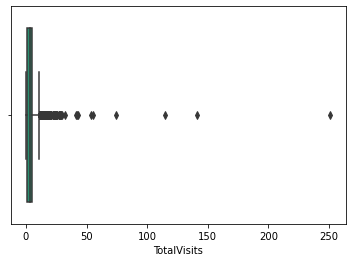

Total Time Spent on Website


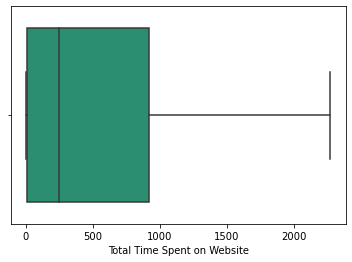

Page Views Per Visit


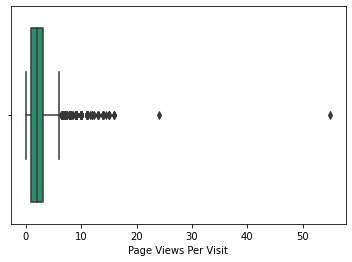

In [31]:
for i in con_cols:
    print(i)
    sns.boxplot(leads_data[i],palette='Dark2')
    plt.show()

In [32]:
# Handling outliers for 'TotalVisits' column
leads_data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [33]:
q1=1
q3=5
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.4*iqr
leads_data=leads_data.loc[(leads_data['TotalVisits'] >= lower_bound) & (leads_data['TotalVisits'] <=upper_bound)]

In [34]:
# Handling outliers for 'Page Views Per Visit' column
leads_data['Page Views Per Visit'].describe()

count    8750.000000
mean        2.248421
std         1.923434
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

In [35]:
q1=0
q3=3
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.4*iqr
leads_data=leads_data.loc[(leads_data['Page Views Per Visit'] >= lower_bound) & (leads_data['Page Views Per Visit'] <=upper_bound)]

In [36]:
# Handling outliers for 'TotalVisits' column
leads_data['TotalVisits'].describe()

count    8599.000000
mean        2.806838
std         2.370099
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: TotalVisits, dtype: float64

In [37]:
leads_data['Page Views Per Visit'].describe()

count    8599.000000
mean        2.136839
std         1.741685
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: Page Views Per Visit, dtype: float64

In [38]:
# ploting bar chart for lead  columns
lead_col=['Lead Origin','Lead Source','What is your current occupation','What matters most to you in choosing a course']

Lead Origin


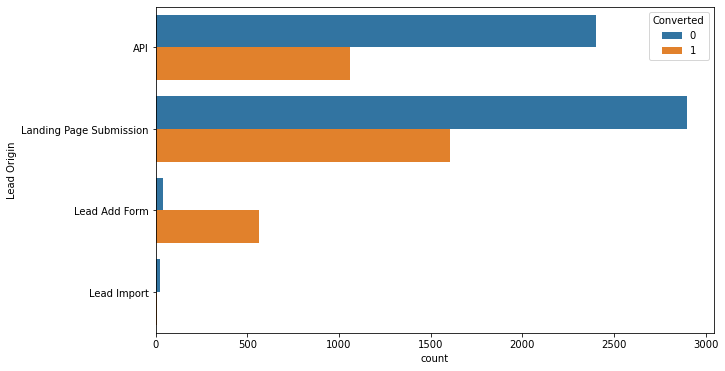

Lead Source


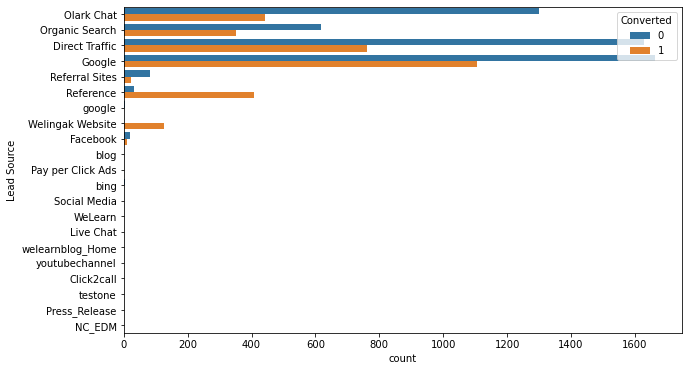

What is your current occupation


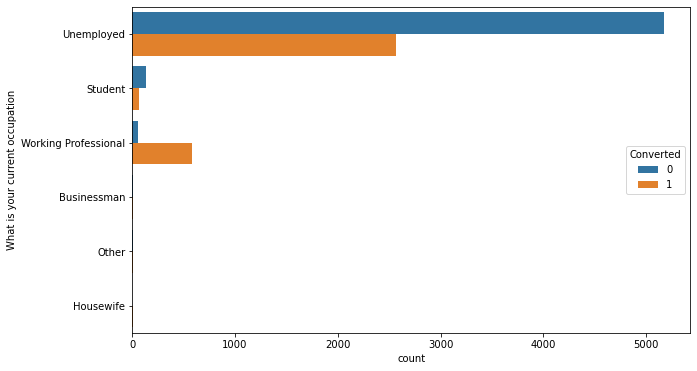

What matters most to you in choosing a course


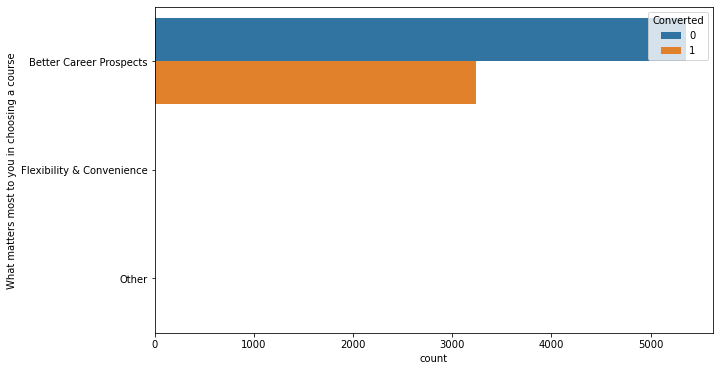

In [39]:
for i in lead_col:
    print(i)
    plt.figure(figsize = (10,6))
    sns.countplot(y=leads_data[i],hue=leads_data.Converted)
    plt.show()    

- In Lead origin conversion % is higher when a lead add form, while when it comes for overall lead conversion then Landing page submission is higher amongst other options.
- In Lead Source conversion % rate is higher than non conversion for reference, while when it comes for overall lead conversion Google search contains highest lead conversion.
- In Occupation conversion % rate is higher than non conversion for working professionals, while Unemployed contains highest lead conversion.
- In 'What is your current occupation','What matters most to you in choosing a course'-column People have choosen course for Better Career Prospects and conversion % is more than 60%.

In [40]:
# Checking value counts for 'What matters most to you in choosing a course'
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      8597
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [41]:
# 'What matters most to you in choosing a course' column is no more required as almost 99% values are choosing one option only.
leads_data.drop('What matters most to you in choosing a course',axis=1, inplace=True)

In [42]:
leads_data.nunique().sort_values()

Newspaper Article                            1
X Education Forums                           1
A free copy of Mastering The Interview       2
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
Digital Advertisement                        2
Through Recommendations                      2
Search                                       2
Newspaper                                    2
Lead Origin                                  4
What is your current occupation              6
TotalVisits                                 11
Specialization                              18
Lead Source                                 21
Page Views Per Visit                        27
Total Time Spent on Website               1681
Prospect ID                               8599
dtype: int64

In [43]:
leads_data.shape

(8599, 18)

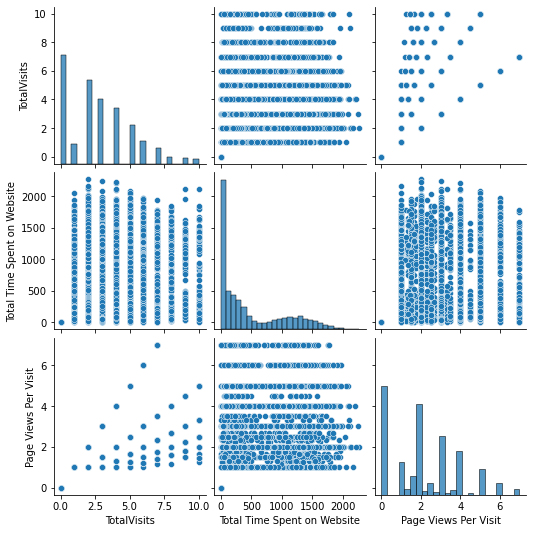

In [44]:
sns.pairplot(leads_data[con_cols])
plt.show()

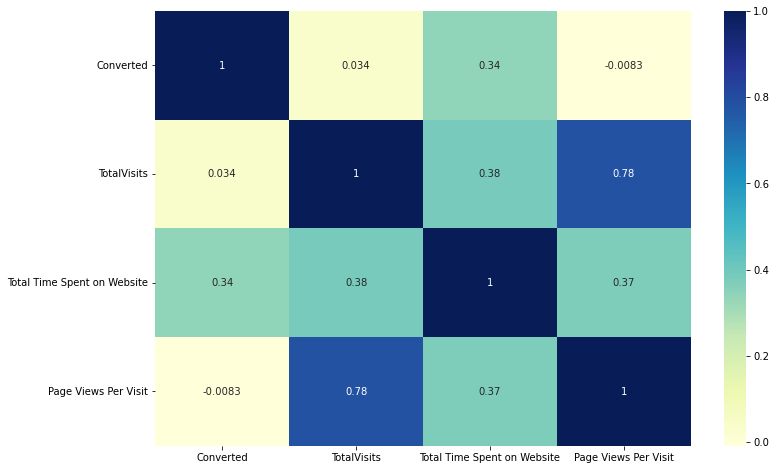

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(leads_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

- Insight

TotalVisits and Page Views Per Visit have high positive correlation.

Converted and Page Views Per Visit have higher negative correlation.

### Data Preparation

In [46]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8599 non-null   object 
 1   Lead Origin                             8599 non-null   object 
 2   Lead Source                             8599 non-null   object 
 3   Do Not Email                            8599 non-null   object 
 4   Do Not Call                             8599 non-null   object 
 5   Converted                               8599 non-null   int64  
 6   TotalVisits                             8599 non-null   float64
 7   Total Time Spent on Website             8599 non-null   int64  
 8   Page Views Per Visit                    8599 non-null   float64
 9   Specialization                          8599 non-null   object 
 10  What is your current occupation         8599 non-null   obje

In [47]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Finance Management,Unemployed,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Finance Management,Unemployed,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Finance Management,Unemployed,No,No,No,No,No,No,No


In [48]:
# Replacing values 'No' with 0 and 'Yes' with 1 to prepare data for Model building
leads_data=leads_data.replace('No',0)

In [49]:
leads_data=leads_data.replace('Yes',1)

In [50]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8599 non-null   object 
 1   Lead Origin                             8599 non-null   object 
 2   Lead Source                             8599 non-null   object 
 3   Do Not Email                            8599 non-null   int64  
 4   Do Not Call                             8599 non-null   int64  
 5   Converted                               8599 non-null   int64  
 6   TotalVisits                             8599 non-null   float64
 7   Total Time Spent on Website             8599 non-null   int64  
 8   Page Views Per Visit                    8599 non-null   float64
 9   Specialization                          8599 non-null   object 
 10  What is your current occupation         8599 non-null   obje

In [51]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Finance Management,Unemployed,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Finance Management,Unemployed,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Finance Management,Unemployed,0,0,0,0,0,0,0


#### Dummy Creation

In [52]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8599 non-null   object 
 1   Lead Origin                             8599 non-null   object 
 2   Lead Source                             8599 non-null   object 
 3   Do Not Email                            8599 non-null   int64  
 4   Do Not Call                             8599 non-null   int64  
 5   Converted                               8599 non-null   int64  
 6   TotalVisits                             8599 non-null   float64
 7   Total Time Spent on Website             8599 non-null   int64  
 8   Page Views Per Visit                    8599 non-null   float64
 9   Specialization                          8599 non-null   object 
 10  What is your current occupation         8599 non-null   obje

In [53]:
leads_data.nunique()

Prospect ID                               8599
Lead Origin                                  4
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 11
Total Time Spent on Website               1681
Page Views Per Visit                        27
Specialization                              18
What is your current occupation              6
Search                                       2
Newspaper Article                            1
X Education Forums                           1
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
dtype: int64

In [54]:
cols=['Lead Origin','Lead Source','Specialization','What is your current occupation','TotalVisits','Page Views Per Visit']
dummies=pd.get_dummies(leads_data[cols],drop_first=True)
leads_data1=pd.concat([leads_data,dummies],axis=1)

In [55]:
# Dummies are created for cols so that should be dropped
leads_data1=leads_data1.drop(cols,axis=1)

In [56]:
leads_data1.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,674,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,1532,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,305,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,1428,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
leads_data1.shape

(8599, 57)

### Splitting the Data into Training and Testing Sets


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X=leads_data1.drop(["Converted","Prospect ID"],axis=1)
y=leads_data1[["Converted"]]

In [60]:
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,305,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1428,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [61]:
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


#### Scaling

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4248,0,0,-0.698561,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6779,0,0,-0.689392,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8284,0,0,-0.262092,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3863,0,0,-0.296936,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1703,0,0,-0.797592,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
print("X_train Shape:", X_train.shape)
print("Y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("Y_test Shape:", y_test.shape)

X_train Shape: (6019, 55)
Y_train Shape: (6019, 1)
X_test Shape: (2580, 55)
Y_test Shape: (2580, 1)


#### Feature selection


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

estimator=LogisticRegression()
estimator.fit(X_train,y_train)

selector=RFE(estimator,n_features_to_select=15)
selector=selector.fit(X_train,y_train)

In [67]:
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 8),
 ('Newspaper Article', False, 35),
 ('X Education Forums', False, 34),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 19),
 ('Through Recommendations', False, 10),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_NC_EDM', False, 38),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 40),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_WeLearn', Fal

In [68]:
selector=selector.fit(X_train,y_train)
selector.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True])

In [69]:
cols_retain=list(X_train.columns[selector.support_])

In [70]:
X_train=X_train[cols_retain]
X_test=X_test[cols_retain]

In [71]:
X_train.shape

(6019, 15)

### Building model using statsmodel, for the detailed statistics

#### Model 1

In [72]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test,has_constant="add")
print(X_train_sm.shape,X_test_sm.shape)
model1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model1.summary()

(6019, 16) (2580, 16)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6003
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2863.6
Date:                Mon, 11 Jul 2022   Deviance:                       5727.2
Time:                        14:12:54   Pearson chi2:                 6.05e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8691      1.539     -0.565      0.572      -3.885       2.147
Do Not Email                                            -1.2335      0.156     -7.931      0.000      -1.538      -0.929
Total Time Spent on Website                              1.0895      0.039     28.278      0.000       1.014       1.165
Newspaper                                              -24.1523   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Add Form                                3.8051      0.582      6.544      0.000       2.665       4.945
Lead Origin_Lead Import                                  1.3102      0.523      2.507      0.012       0.286       2.334
Lead Source_Olark Chat                                   0.8082      0.092      8.771      0.000       0.628       0.989
Lead Source_Reference                                    0.4150      0.620      0.669      0.504      -0.801       1.631
Lead Source_Referral Sites                              -0.6478      0.357     -1.814      0.070      -1.348       0.052
Lead Source_Welingak Website                             2.8324      1.161      2.440      0.015       0.557       5.107
Lead Source_google                                     -21.3578   2.19e+04     -0.001      0.999   -4.29e+04    4.28e+04
What is your current occupation_Housewife               22.3595   1.54e+04      0.001      0.999   -3.02e+04    3.03e+04
What is your current occupation_Other                   -0.1209      1.704     -0.071      0.943      -3.460       3.218
What is your current occupation_Student                 -0.0751      1.552     -0.048      0.961      -3.117       2.967
What is your current occupation_Unemployed              -0.2221      1.538     -0.144      0.885      -3.237       2.793
What is your current occupation_Working Professional     2.5696      1.548      1.660      0.097      -0.465       5.604
========================================================================================================================
"""

In [73]:
X_train_sm = X_train_sm.drop(['const'], axis=1)

In [74]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_sm
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,17.88
6,Lead Source_Reference,14.07
8,Lead Source_Welingak Website,4.72
5,Lead Source_Olark Chat,1.59
13,What is your current occupation_Unemployed,1.56
1,Total Time Spent on Website,1.30
14,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.10
7,Lead Source_Referral Sites,1.02
12,What is your current occupation_Student,1.02


#### Model 2

In [75]:
X_train_sm = X_train_sm.drop(['Lead Origin_Lead Add Form'], axis=1)

In [76]:
X_train_sm=sm.add_constant(X_train_sm)
X_test_sm=sm.add_constant(X_test,has_constant="add")
print(X_train_sm.shape,X_test_sm.shape)
model2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model2.summary()

(6019, 15) (2580, 16)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6004
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2893.2
Date:                Mon, 11 Jul 2022   Deviance:                       5786.4
Time:                        14:12:54   Pearson chi2:                 6.12e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8309      1.534     -0.542      0.588      -3.837       2.175
Do Not Email                                            -1.1775      0.153     -7.678      0.000      -1.478      -0.877
Total Time Spent on Website                              1.0630      0.038     27.960      0.000       0.988       1.138
Newspaper                                              -24.1178   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Lead Import                                  1.2571      0.522      2.407      0.016       0.233       2.281
Lead Source_Olark Chat                                   0.7606      0.091      8.337      0.000       0.582       0.939
Lead Source_Reference                                    4.1614      0.236     17.641      0.000       3.699       4.624
Lead Source_Referral Sites                              -0.6683      0.355     -1.882      0.060      -1.364       0.028
Lead Source_Welingak Website                             6.5720      1.010      6.508      0.000       4.593       8.551
Lead Source_google                                     -21.3845   2.19e+04     -0.001      0.999    -4.3e+04     4.3e+04
What is your current occupation_Housewife               22.3182   1.55e+04      0.001      0.999   -3.03e+04    3.04e+04
What is your current occupation_Other                   -0.1398      1.698     -0.082      0.934      -3.468       3.188
What is your current occupation_Student                 -0.0981      1.547     -0.063      0.949      -3.129       2.933
What is your current occupation_Unemployed              -0.2298      1.533     -0.150      0.881      -3.235       2.775
What is your current occupation_Working Professional     2.5543      1.543      1.655      0.098      -0.470       5.578
========================================================================================================================
"""

In [77]:
X_train_sm = X_train_sm.drop(['const'], axis=1)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_sm
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.58
12,What is your current occupation_Unemployed,1.55
1,Total Time Spent on Website,1.30
5,Lead Source_Reference,1.21
13,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.10
7,Lead Source_Welingak Website,1.04
6,Lead Source_Referral Sites,1.02
11,What is your current occupation_Student,1.02
3,Lead Origin_Lead Import,1.01


VIF is below 5, so its suitable but p values of certain variables are high.

Droping Newspaper column as it has high p value(more than 0.5)

#### Model-3

In [79]:
X_train_sm = X_train_sm.drop(['Newspaper'], axis=1)

In [80]:
X_train_sm=sm.add_constant(X_train_sm)
X_test_sm=sm.add_constant(X_test,has_constant="add")
print(X_train_sm.shape,X_test_sm.shape)
model3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model3.summary()

(6019, 14) (2580, 16)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6005
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.0
Date:                Mon, 11 Jul 2022   Deviance:                       5789.9
Time:                        14:12:54   Pearson chi2:                 6.12e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8292      1.533     -0.541      0.589      -3.834       2.175
Do Not Email                                            -1.1762      0.153     -7.672      0.000      -1.477      -0.876
Total Time Spent on Website                              1.0606      0.038     27.931      0.000       0.986       1.135
Lead Origin_Lead Import                                  1.2553      0.522      2.403      0.016       0.232       2.279
Lead Source_Olark Chat                                   0.7589      0.091      8.321      0.000       0.580       0.938
Lead Source_Reference                                    4.1594      0.236     17.634      0.000       3.697       4.622
Lead Source_Referral Sites                              -0.6670      0.355     -1.879      0.060      -1.363       0.029
Lead Source_Welingak Website                             6.5698      1.010      6.506      0.000       4.591       8.549
Lead Source_google                                     -21.3837    2.2e+04     -0.001      0.999   -4.31e+04     4.3e+04
What is your current occupation_Housewife               22.3159   1.55e+04      0.001      0.999   -3.03e+04    3.04e+04
What is your current occupation_Other                   -0.1395      1.697     -0.082      0.934      -3.466       3.187
What is your current occupation_Student                 -0.0992      1.546     -0.064      0.949      -3.129       2.931
What is your current occupation_Unemployed              -0.2316      1.532     -0.151      0.880      -3.235       2.772
What is your current occupation_Working Professional     2.5527      1.542      1.655      0.098      -0.470       5.575
========================================================================================================================
"""

In [81]:
X_train_sm = X_train_sm.drop(['const'], axis=1)

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_sm
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.58
11,What is your current occupation_Unemployed,1.55
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.21
12,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.10
6,Lead Source_Welingak Website,1.04
5,Lead Source_Referral Sites,1.02
10,What is your current occupation_Student,1.02
2,Lead Origin_Lead Import,1.01


#### Model-4

In [83]:
X_train_sm = X_train_sm.drop(['Lead Source_google'], axis=1)

In [84]:
X_train_sm=sm.add_constant(X_train_sm)
X_test_sm=sm.add_constant(X_test,has_constant="add")
print(X_train_sm.shape,X_test_sm.shape)
model4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model4.summary()

(6019, 13) (2580, 16)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6006
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.1
Date:                Mon, 11 Jul 2022   Deviance:                       5792.2
Time:                        14:12:55   Pearson chi2:                 6.12e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8302      1.533     -0.542      0.588      -3.834       2.174
Do Not Email                                            -1.1768      0.153     -7.678      0.000      -1.477      -0.876
Total Time Spent on Website                              1.0608      0.038     27.939      0.000       0.986       1.135
Lead Origin_Lead Import                                  1.2568      0.522      2.406      0.016       0.233       2.281
Lead Source_Olark Chat                                   0.7604      0.091      8.337      0.000       0.582       0.939
Lead Source_Reference                                    4.1610      0.236     17.640      0.000       3.699       4.623
Lead Source_Referral Sites                              -0.6657      0.355     -1.875      0.061      -1.362       0.030
Lead Source_Welingak Website                             6.5715      1.010      6.508      0.000       4.592       8.551
What is your current occupation_Housewife               22.3168   1.55e+04      0.001      0.999   -3.03e+04    3.04e+04
What is your current occupation_Other                   -0.1387      1.697     -0.082      0.935      -3.465       3.187
What is your current occupation_Student                 -0.0987      1.546     -0.064      0.949      -3.128       2.931
What is your current occupation_Unemployed              -0.2320      1.532     -0.151      0.880      -3.235       2.771
What is your current occupation_Working Professional     2.5534      1.542      1.656      0.098      -0.469       5.576
========================================================================================================================
"""

In [85]:
X_train_sm = X_train_sm.drop(['const','What is your current occupation_Housewife'], axis=1)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_sm
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.58
9,What is your current occupation_Unemployed,1.55
1,Total Time Spent on Website,1.30
4,Lead Source_Reference,1.20
10,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.10
6,Lead Source_Welingak Website,1.04
5,Lead Source_Referral Sites,1.02
8,What is your current occupation_Student,1.02
2,Lead Origin_Lead Import,1.01


#### Model-5

In [87]:
X_train_sm=sm.add_constant(X_train_sm)
X_test_sm=sm.add_constant(X_test,has_constant="add")
print(X_train_sm.shape,X_test_sm.shape)
model5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model5.summary()

(6019, 12) (2580, 16)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6007
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2897.7
Date:                Mon, 11 Jul 2022   Deviance:                       5795.3
Time:                        14:12:55   Pearson chi2:                 6.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1488      1.183      0.971      0.331      -1.169       3.467
Do Not Email                                            -1.1769      0.153     -7.680      0.000      -1.477      -0.877
Total Time Spent on Website                              1.0599      0.038     27.932      0.000       0.985       1.134
Lead Origin_Lead Import                                  1.2549      0.522      2.402      0.016       0.231       2.279
Lead Source_Olark Chat                                   0.7564      0.091      8.297      0.000       0.578       0.935
Lead Source_Reference                                    4.1573      0.236     17.631      0.000       3.695       4.619
Lead Source_Referral Sites                              -0.6664      0.355     -1.877      0.060      -1.362       0.029
Lead Source_Welingak Website                             6.5696      1.010      6.506      0.000       4.590       8.549
What is your current occupation_Other                   -2.1166      1.390     -1.523      0.128      -4.841       0.607
What is your current occupation_Student                 -2.0763      1.200     -1.730      0.084      -4.429       0.276
What is your current occupation_Unemployed              -2.2100      1.183     -1.868      0.062      -4.528       0.109
What is your current occupation_Working Professional     0.5751      1.195      0.481      0.630      -1.768       2.918
========================================================================================================================
"""

In [88]:
X_train_sm = X_train_sm.drop(['const','What is your current occupation_Working Professional'], axis=1)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_sm
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.54
9,What is your current occupation_Unemployed,1.52
1,Total Time Spent on Website,1.25
0,Do Not Email,1.10
4,Lead Source_Reference,1.08
6,Lead Source_Welingak Website,1.04
8,What is your current occupation_Student,1.02
2,Lead Origin_Lead Import,1.01
5,Lead Source_Referral Sites,1.01
7,What is your current occupation_Other,1.00


#### Model-6

In [90]:
X_train_sm=sm.add_constant(X_train_sm)
X_test_sm=sm.add_constant(X_test,has_constant="add")
print(X_train_sm.shape,X_test_sm.shape)
model6=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model6.summary()

(6019, 11) (2580, 16)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6008
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2897.8
Date:                Mon, 11 Jul 2022   Deviance:                       5795.5
Time:                        14:12:55   Pearson chi2:                 6.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7134      0.173      9.896      0.000       1.374       2.053
Do Not Email                                  -1.1765      0.153     -7.678      0.000      -1.477      -0.876
Total Time Spent on Website                    1.0598      0.038     27.931      0.000       0.985       1.134
Lead Origin_Lead Import                        1.2554      0.522      2.404      0.016       0.232       2.279
Lead Source_Olark Chat                         0.7562      0.091      8.294      0.000       0.577       0.935
Lead Source_Reference                          4.1565      0.236     17.627      0.000       3.694       4.619
Lead Source_Referral Sites                    -0.6660      0.355     -1.877      0.061      -1.362       0.030
Lead Source_Welingak Website                   6.5695      1.010      6.506      0.000       4.590       8.549
What is your current occupation_Other         -2.6812      0.750     -3.573      0.000      -4.152      -1.211
What is your current occupation_Student       -2.6408      0.270     -9.785      0.000      -3.170      -2.112
What is your current occupation_Unemployed    -2.7745      0.176    -15.783      0.000      -3.119      -2.430
==============================================================================================================
"""

VIF for all variables are less than 5 so model is good, also p values of all variables are less than 0.05 so this model is perfect.

### Evaluation


In [91]:
X_train_sm.shape

(6019, 11)

In [92]:
y_train_pred = model6.predict(X_train_sm)
y_train_pred[:10]

4248    0.141671
6779    0.142857
8284    0.207693
3863    0.201681
1703    0.129382
7750    0.798868
1508    0.204829
4597    0.241847
1819    0.416791
8705    0.232702
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14167103, 0.1428569 , 0.20769285, 0.20168143, 0.12938162,
       0.79886763, 0.20482899, 0.24184713, 0.41679104, 0.2327024 ])

In [94]:
y_train_pred_final = pd.DataFrame({"Converted":y_train.Converted, "Converted_probability":y_train_pred})
y_train_pred_final.head()

,Converted,Converted_probability
4248,0,0.141671
6779,0,0.142857
8284,1,0.207693
3863,0,0.201681
1703,0,0.129382


In [95]:
y_train_pred_final["predicted"] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.54 else 0)
y_train_pred_final

,Converted,Converted_probability,predicted
4248,0,0.141671,0
6779,0,0.142857,0
8284,1,0.207693,0
3863,0,0.201681,0
1703,0,0.129382,0
...,...,...,...
398,0,0.227552,0
89,0,0.532583,0
8653,0,0.227552,0
7455,1,0.626972,1


#### Confusion matrix

In [96]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3331  396]
 [ 969 1323]]


In [97]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7732181425485961

### Metrics beyond simply accuracy

In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5772251308900523

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.8937483230480279

In [101]:
# positive predictive value 
print (TP / float(TP+FP))

0.7696335078534031


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7746511627906977


### Plotting the ROC Curve

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )

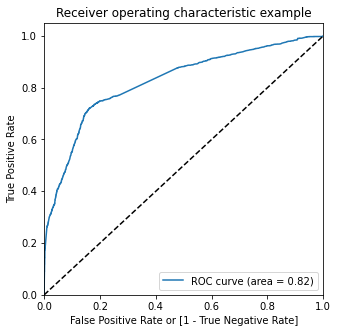

In [105]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

### Finding Optimal Cutoff Point

In [106]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
4248,0,0.141671,0,1,1,0,0,0,0,0,0,0,0
6779,0,0.142857,0,1,1,0,0,0,0,0,0,0,0
8284,1,0.207693,0,1,1,1,0,0,0,0,0,0,0
3863,0,0.201681,0,1,1,1,0,0,0,0,0,0,0
1703,0,0.129382,0,1,1,0,0,0,0,0,0,0,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380794  1.000000  0.000000
0.1   0.1  0.430636  0.990838  0.086128
0.2   0.2  0.619870  0.892670  0.452106
0.3   0.3  0.786842  0.736038  0.818084
0.4   0.4  0.793321  0.689791  0.856990
0.5   0.5  0.777704  0.609511  0.881138
0.6   0.6  0.761090  0.515707  0.911994
0.7   0.7  0.744310  0.410558  0.949557
0.8   0.8  0.723542  0.308464  0.978803
0.9   0.9  0.687656  0.185864  0.996244


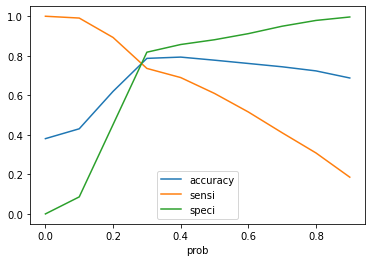

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
4248,0,0.141671,0,1,1,0,0,0,0,0,0,0,0,0
6779,0,0.142857,0,1,1,0,0,0,0,0,0,0,0,0
8284,1,0.207693,0,1,1,1,0,0,0,0,0,0,0,0
3863,0,0.201681,0,1,1,1,0,0,0,0,0,0,0,0
1703,0,0.129382,0,1,1,0,0,0,0,0,0,0,0,0


In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7868416680511713

In [111]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3049,  678],
       [ 605, 1687]], dtype=int64)

In [112]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [113]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7360383944153578

In [114]:
# Let us calculate specificity
TN / float(TN+FP)

0.8180842500670781

In [115]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18191574993292192


In [116]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7133192389006342


In [117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8344280240831965


## Precision and Recall

In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3331,  396],
       [ 969, 1323]], dtype=int64)

#### Precision

In [119]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7696335078534031

##### Recall


In [120]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5772251308900523

In [121]:
from sklearn.metrics import precision_score, recall_score

In [122]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7696335078534031

In [123]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.5772251308900523

### Precision and recall tradeoff

In [124]:
from sklearn.metrics import precision_recall_curve

In [125]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(4248    0
 6779    0
 8284    1
 3863    0
 1703    0
        ..
 398     0
 89      0
 8653    0
 7455    1
 6072    0
 Name: Converted, Length: 6019, dtype: int64,
 4248    0
 6779    0
 8284    0
 3863    0
 1703    0
        ..
 398     0
 89      0
 8653    0
 7455    1
 6072    0
 Name: predicted, Length: 6019, dtype: int64)

In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

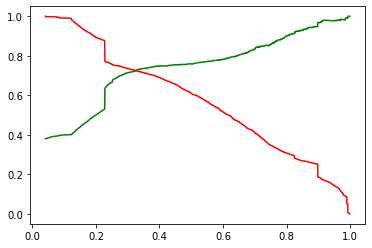

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [128]:
X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

In [129]:
test_cols=X_train_sm.columns[1:]              
X_test_final=X_test[test_cols]               
X_test_final=sm.add_constant(X_test_final)  
y_pred_test=model6.predict(X_test_final) 

In [130]:
y_test_pred_final=pd.DataFrame({'Converted':y_test.Converted,'Converted_probability':y_pred_test,'Prospect ID':y_test.index})

y_test_pred_final.head() 

,Converted,Converted_probability,Prospect ID
1584,0,0.236893,1584
999,1,0.833631,999
681,0,0.093707,681
4943,1,0.361422,4943
7485,0,0.150395,7485


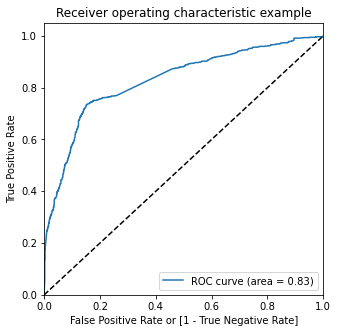

In [131]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_probability)


### Model Evaluation

In [132]:
# Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_probability,Prospect ID,Predicted
1584,0,0.236893,1584,0
999,1,0.833631,999,1
681,0,0.093707,681,0
4943,1,0.361422,4943,1
7485,0,0.150395,7485,0


In [133]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)


0.7976744186046512

In [134]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion2

array([[1354,  282],
       [ 240,  704]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7457627118644068

In [137]:
# Let us calculate specificity
TN / float(TN+FP)

0.8276283618581907

#### Precision and Recall


#### Precision

In [138]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
confusion

array([[3331,  396],
       [ 969, 1323]], dtype=int64)

In [139]:
confusion2[1,1]/(confusion[0,1]+confusion[1,1])

0.40954043048283884

#### Recall

In [140]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])


0.5772251308900523

In [141]:
from sklearn.metrics import precision_score, recall_score


In [142]:
precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)


0.7139959432048681

In [143]:
recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)


0.7457627118644068

#### Precision and recall tradeoff


In [144]:
from sklearn.metrics import precision_recall_curve


In [145]:
y_test_pred_final.Converted, y_test_pred_final.Predicted


(1584    0
 999     1
 681     0
 4943    1
 7485    0
        ..
 8614    0
 174     1
 1967    1
 4175    0
 543     0
 Name: Converted, Length: 2580, dtype: int64,
 1584    0
 999     1
 681     0
 4943    1
 7485    0
        ..
 8614    0
 174     1
 1967    1
 4175    0
 543     0
 Name: Predicted, Length: 2580, dtype: int64)

In [146]:
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_probability)


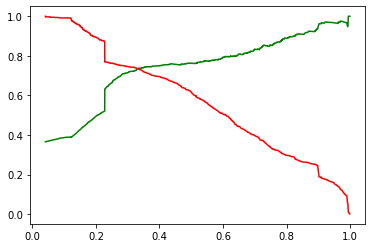

In [147]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()